# Responsi 4 - Regresi Linear Berganda

# Definisi

Regresi Linear Berganda (**RLB**) adalah sebuah metode statistik yang digunakan untuk memodelkan hubungan antara **satu variabel dependen (variabel respons)** dengan **dua atau lebih variabel independen (variabel prediktor)**. Dalam perhitungannya kerap digunakan matriks sebagai bentuk nyata bahwa regresi ini adalah kelanjutan regresi sederhana yang memiliki jumlah variabel lebih banyak.

# Praktik

Pertemuan kali ini akan melakukan eksplorasi seputar "**Regresi Linear Berganda**" dengan data bangkitan untuk mengetahui seperti apa model yang akan terbentuk dan bagaimana alurnya mulai dari pembangkitan data hingga perbandingan model.

## Membangkitkan data simulasi

In [1]:
import numpy as np
import pandas as pd

np.random.seed(1015) # Pengetauran set data
n = 100 # Jumlah objek amatan
p = 3 # Jumlah parameter

# Bangkitan data distribusi seragam rentang dari 3 hingga 8
x1 = np.random.uniform(3, 8, n)
# Bangkitan data ditribusi normal dengan rerata 2, sd 2
x2 = np.random.normal(2, 2, n)
# Vektor 1 matriks X
x0 = np.ones(n)

# Membuat DataFrame X
X = pd.DataFrame({'x0': x0, 'x1': x1, 'x2': x2})
print(X.head())

    x0        x1        x2
0  1.0  6.137557  6.132070
1  1.0  3.696883  2.497769
2  1.0  6.088342  3.006564
3  1.0  6.241749  0.943141
4  1.0  7.100512  2.588196


## Pembentukan _error_ dan persamaan y (Komponen Acak)

In [2]:
# Bangkitan data ditribusi normal dengan rerata 0, sd 2
e = np.random.normal(0,2,n)
y = 5 + 4*x1 + 3*x2 + e # Persamaan model y
rand_comp = pd.DataFrame({'e': e, 'y': y})
print(rand_comp.head())

          e          y
0 -0.020079  47.926361
1  2.822893  30.103731
2 -0.289741  38.083319
3 -1.416849  31.379571
4  3.175593  44.342231


In [3]:
dt = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
print(dt.head())

           y        x1        x2
0  47.926361  6.137557  6.132070
1  30.103731  3.696883  2.497769
2  38.083319  6.088342  3.006564
3  31.379571  6.241749  0.943141
4  44.342231  7.100512  2.588196


# Eksplorasi Data

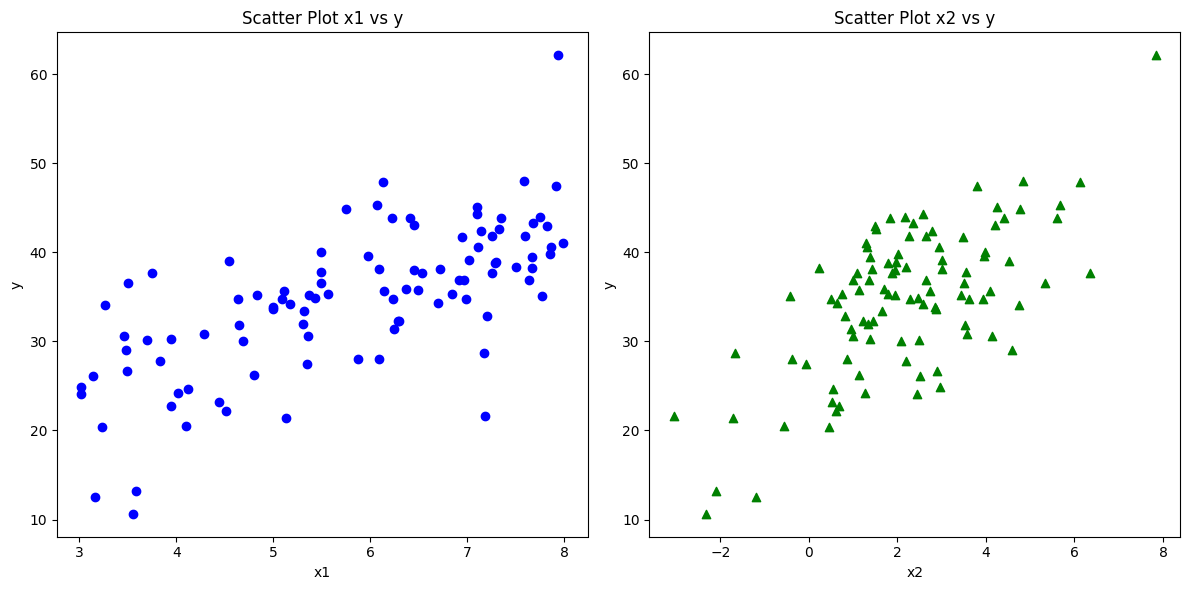

In [ ]:
import matplotlib.pyplot as plt

# Membuat dua scatter plot dalam satu baris
plt.figure(figsize=(12, 6))

# Scatter plot antara x1 dan y
plt.subplot(1, 2, 1)
plt.scatter(x1, y, marker='o', color='blue')
plt.title('Scatter Plot x1 vs y')
plt.xlabel('x1')
plt.ylabel('y')

# Scatter plot antara x2 dan y
plt.subplot(1, 2, 2)
plt.scatter(x2, y, marker='^', color='green')
plt.title('Scatter Plot x2 vs y')
plt.xlabel('x2')
plt.ylabel('y')

# Menampilkan plot
plt.tight_layout()
plt.show()

Kedua plot eksplorasi memberikan gambaran pada kecenderungan korelasi antar peubah y dengan masing-masing peubah x berupa tren positif diikuti dengan keragaman yang cukup besar.

## Pembentukan model (Perhitungan matriks manual)

### Parameter Regresi

$$
b_{(k+1)\times1}=(X'X)_{(k+1)\times(k+1)}^{-1}X'_{(k+1)\times{n}}y_{(n\times1)}
$$

In [5]:
# Membuat matriks y
y = y.reshape(-1, 1)
# Membuat matriks X
X = np.column_stack((x0, x1, x2))
# Menghitung koefisien regresi menggunakan metode least squares
b = np.round(np.linalg.inv(X.T @ X) @ X.T @ y,4)

In [6]:
# Mengambil koefisien b0, b1, dan b2
b0 = b[0, 0]
b1 = b[1, 0]
b2 = b[2, 0]

# Mencetak hasil
print(f"b0: {b0}")
print(f"b1: {b1}")
print(f"b2: {b2}")

b0: 5.4767
b1: 3.9217
b2: 2.9492


### Koefisien determinasi dan penyesuaiannya

$$
\hat{\sigma}^2=\frac{SSR_{esidual}}{n-p}=\frac{y'y-\hat{\beta}x'y}{n-p}
$$

In [7]:
# Koefisien regresi dengan metode OLS
sigma_kuadrat = (y.T @ y - b.T @ X.T @ y) / (n - p) # Menghitung varians residual (sigma_kuadrat)
Res_se = np.round(np.sqrt(sigma_kuadrat),3) # Menghitung standar error residual (Res_se)
print(f"Res_se: {Res_se[0, 0]}")

Res_se: 1.876


nilai koefisien regresi menunjukkan bahwa, secara rata-rata, prediksi model menyimpang sekitar **2.247** unit dari nilai aktual $y$.

In [8]:
# Degree of freedom (Derajat Bebas)
df = n-p
df

97

In [9]:
# Menghitung nilai prediksi y_duga
y_duga = b0 + b1 * x1 + b2 * x2
# Membuat DataFrame Y dengan kolom y dan y_duga
Y = pd.DataFrame({'y': y.flatten(), 'y_duga': y_duga})

print(Y.head())

           y     y_duga
0  47.926361  47.631060
1  30.103731  27.341185
2  38.083319  38.220309
3  31.379571  32.736480
4  44.342231  40.955888


In [10]:
# Menghitung R-squared
R_squared = np.round((np.corrcoef(y.flatten(), y_duga)[0, 1]) ** 2,4)
print(f"R_squared: {R_squared}")

R_squared: 0.9488


$R^2$ mengukur proporsi variasi dalam variabel dependen $y$ yang dapat dijelaskan oleh variabel independen dalam model. Nilai $R^2$ sebesar **0.9323** menunjukkan bahwa sekitar **93.23%** dari variasi dalam $y$ dapat dijelaskan oleh model regresi. Ini menunjukkan bahwa model memiliki kecocokan yang sangat baik dengan data.

In [11]:
R_squared_adj = np.round(1-((1-R_squared)*(n-1)/(n-p)),4)
print(f"R_squared_adj: {R_squared_adj}")


R_squared_adj: 0.9477


Adjusted $R^2$ memperhitungkan jumlah variabel independen dalam model dan memberikan penalti untuk model yang terlalu kompleks. Nilai adjusted $R^2$ sebesar **0.9309** menunjukkan bahwa meskipun ada penalti untuk jumlah variabel, model masih mampu menjelaskan **93.09%** dari variasi dalam $y$.

### Uji F dan Std. Error parameter regresi

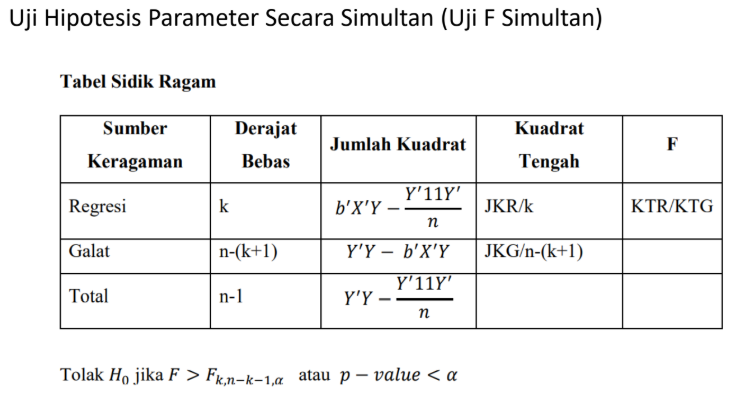

In [12]:
from IPython.display import Image, display
display(Image("C:/Users/faeri/OneDrive/Pictures/Screenshot/Screenshot 2025-02-17 123708.png"))


In [13]:
galat = y.flatten() - y_duga
KTReg = sum((y_duga - np.mean(y))**2) / (p - 1) # Menghitung jumlah kuadrat regresi (KTReg)
KTG = sum(galat**2) / (n - p) # Menghitung jumlah kuadrat galat (KTG)
Fhit = KTReg / KTG # Menghitung nilai F-statistic (Fhit)

print(f"KTReg: {KTReg}")
print(f"KTG: {KTG}")
print(f"Fhit: {np.round(Fhit, 0)}")

KTReg: 3167.441581859027
KTG: 3.5217716208262466
Fhit: 899.0


In [14]:
dbreg = p - 1; print(f"dbr: {dbreg}") # Derajat bebas regresi
dbg = n - p; print(f"dbg: {dbg}") # Derajat bebas galat

dbr: 2
dbg: 97


In [15]:
from scipy.stats import f

# p-value untuk uji F
Fhit = (np.sum((b.flatten() - np.mean(y.flatten()))**2) / dbreg) / (np.sum(galat**2) / dbg)
p_value = 1 - f.cdf(Fhit, dbreg, dbg)
print(f"p-value: {p_value}")

p-value: 1.1102230246251565e-16


In [16]:
# Standar error koefisien regresi
se_b = np.sqrt(sigma_kuadrat[0, 0] * np.linalg.inv(X.T @ X).diagonal())
print(f"Standar error koefisien regresi: {se_b}")

Standar error koefisien regresi: [0.79685786 0.12730347 0.09887311]


In [17]:
# Mengambil standar error untuk b0, b1, dan b2
se_b0 = se_b[0]
se_b1 = se_b[1]
se_b2 = se_b[2]

# Mencetak hasil
print(f"se_b0: {round(se_b0, 4)}")
print(f"se_b1: {round(se_b1, 4)}")
print(f"se_b2: {round(se_b2, 4)}")

se_b0: 0.7969
se_b1: 0.1273
se_b2: 0.0989


### Signifikansi Parameter (nilai-t)

In [18]:
# Menghitung t-value
t_b0 = b0 / se_b0
t_b1 = b1 / se_b1
t_b2 = b2 / se_b2

# Menampilkan t-value
print(f"t_b0: {round(t_b0, 2)}")
print(f"t_b1: {round(t_b1, 2)}")
print(f"t_b2: {round(t_b2, 2)}")

t_b0: 6.87
t_b1: 30.81
t_b2: 29.83


In [19]:
from scipy.stats import t

# Menghitung p-value
p_b0 = 2 * t.sf(abs(t_b0), df)
p_b1 = 2 * t.sf(abs(t_b1), df)
p_b2 = 2 * t.sf(abs(t_b2), df)

# Menampilkan p-value
print(f"p_b0: {p_b0}")
print(f"p_b1: {p_b1}")
print(f"p_b2: {p_b2}")

p_b0: 6.089053676451222e-10
p_b1: 6.905134123330756e-52
p_b2: 1.1735633767121937e-50


### Selang Kepercayaan $(1-\alpha)/100\%$


In [20]:
# Menghitung t-value untuk interval kepercayaan 97.5%
t_value = t.ppf(0.975, df=n - p)

# Menghitung batas bawah dan batas atas untuk interval kepercayaan
BB_b0 = b0 - t_value * se_b0
BA_b0 = b0 + t_value * se_b0

BB_b1 = b1 - t_value * se_b1
BA_b1 = b1 + t_value * se_b1

BB_b2 = b2 - t_value * se_b2
BA_b2 = b2 + t_value * se_b2

# Membuat matriks batas bawah dan batas atas
Batas_Bawah = np.array([round(BB_b0, 6), round(BB_b1, 6), round(BB_b2, 6)])
Batas_Atas = np.array([round(BA_b0, 6), round(BA_b1, 6), round(BA_b2, 6)])
Fit = np.array([round(b0,6), round(b1,6), round(b2,6)])

# Menggabungkan batas bawah dan batas atas menjadi DataFrame
Selang_Kepercayaan = pd.DataFrame({
    "Batas bawah Selang (2.5%)": Batas_Bawah,
    "Fit": Fit,
    "Batas atas Selang (97.5%)": Batas_Atas
}, index=["Intersep", "b1", "b2"])

# Menampilkan hasil
print(Selang_Kepercayaan)

          Batas bawah Selang (2.5%)     Fit  Batas atas Selang (97.5%)
Intersep                   3.895158  5.4767                   7.058242
b1                         3.669038  3.9217                   4.174362
b2                         2.752964  2.9492                   3.145436


## Pembentukan model (library `statsmodels` & fungsi `ols`)

Dalam penggunaan library `statsmodels` dan fungsi `ols()`, kita akan memperoleh secara langsung nilai-nilai pada pemodelan regresi dari data yang kita miliki. Dengan menggunakan fungsi `summary()`, `anova_lm()`, dan `conf_int()` dari model yang terbentuk maka dapat diperoleh **nilai parameter**, **signifikansi**, **standar eror**, **koefisien determinasi**, serta **selang kepercayaan**.

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

np.random.seed(1015) # Pengetauran set data
n = 100 # Jumlah objek amatan
p = 3 # Jumlah parameter

# Bangkitan data distribusi seragam rentang dari 3 hingga 8
x1 = np.random.uniform(3, 8, n)
# Bangkitan data ditribusi normal dengan rerata 2, sd 2
x2 = np.random.normal(2, 2, n)
# Bangkitan data ditribusi normal dengan rerata 0, sd 2
e = np.random.normal(0,2,n)
# Persamaan model y
y = 5 + 4*x1 + 3*x2 + e

# Membuat DataFrame dt dengan kolom y, x1, dan x2
dt = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})

# Melakukan regresi linier
model = ols('y ~ x1 + x2', data=dt).fit()
# Menampilkan ringkasan model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     899.4
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           2.43e-63
Time:                        01:27:07   Log-Likelihood:                -203.32
No. Observations:                 100   AIC:                             412.6
Df Residuals:                      97   BIC:                             420.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4767      0.797      6.870      0.0

In [22]:
# Melakukan uji ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

               sum_sq    df           F        PR(>F)
x1        3339.541636   1.0  948.256165  7.149277e-52
x2        3131.054502   1.0  889.056661  1.212362e-50
Residual   341.611846  97.0         NaN           NaN


In [23]:
# Menampilkan interval kepercayaan
conf_int = model.conf_int()
print(conf_int)

                  0         1
Intercept  3.894518  7.058828
x1         3.668913  4.174433
x2         2.752935  3.145559


## Perbandingan manual (matriks) dan fungsi `ols()`

In [24]:
# Mengambil koefisien dari model
koef = model.params.values

# Menghitung koefisien regresi secara manual
X = sm.add_constant(dt[['x1', 'x2']])  # Menambahkan intercept
b = np.linalg.inv(X.T @ X) @ X.T @ dt['y']

# Menggabungkan koefisien ke dalam DataFrame
penduga = pd.DataFrame({'matriks': b, 'fungsi ols': koef})
penduga.index = ['intersep', 'b1', 'b2']

# Menampilkan hasil
print(penduga)

           matriks  fungsi ols
intersep  5.476673    5.476673
b1        3.921673    3.921673
b2        2.949247    2.949247


Berdasar perbandingan ini diperoleh hasil yang sama yang artinya penggunaan matriks secara manual sudah tepat dalam memodelkan regresi linear berganda bergitu pula sebaliknya.

# Tambahan: Perbandingan 2 model

In [25]:
# Model 1: y ~ x1 + x2
reg1 = ols('y ~ x1 + x2', data=dt).fit()
r_sq1 = reg1.rsquared
adj_r_sq1 = reg1.rsquared_adj
se1 = reg1.scale ** 0.5  # Standar error dari residual

# Model 2: y ~ x1 + x2 tanpa intercept
reg2 = ols('y ~ x1 + x2 - 1', data=dt).fit()
r_sq2 = reg2.rsquared
adj_r_sq2 = reg2.rsquared_adj
se2 = reg2.scale ** 0.5  # Standar error dari residual

# Membandingkan kebaikan model
model_comparison = np.array([[r_sq1, r_sq2],
                              [adj_r_sq1, adj_r_sq2],
                              [se1, se2]])

# Membuat DataFrame untuk tabel
tabel = pd.DataFrame(model_comparison, 
                     columns=["Model 1", "Model 2"],
                     index=["R-Square", "Adj R-Square", "Standar Error Sisaan"])

# Menampilkan tabel
print(tabel)

                       Model 1   Model 2
R-Square              0.948834  0.996000
Adj R-Square          0.947779  0.995918
Standar Error Sisaan  1.876638  2.276403


Perbandingan yang dilakukan memberikan gambaran bagaimana membandingkan 2 buah model regresi berganda. Dari perbandingan ini diperoleh bahwa penggunaan $adj.R^2$ akan lebih baik dari penggunaan $R^2$ untuk membandingkan mana model terbaik.